In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
df=pd.read_csv('/content/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
label_encoder=LabelEncoder()
df['Extracurricular Activities']=label_encoder.fit_transform(df['Extracurricular Activities'])

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
x=df.drop('Performance Index',axis=1)
y=df['Performance Index']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Standardise the numerical column

scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [ ]:
models={
    "Linear Regression":LinearRegression(),
    "Decision Tree":DecisionTreeRegressor(random_state=42),
    "Random Forest":RandomForestRegressor(random_state=42)
}
metrics={}
for model_name,model in models.items():
  model.fit(x_train,y_train)
  y_pred= model.predict(x_test)
  mae= mean_absolute_error(y_test,y_pred)
  mse=mean_squared_error(y_test,y_pred)
  r2= r2_score(y_test,y_pred)
  metrics[model_name]={
      "MAE":mae,
      "MSE":mse,
      "R^2 Score":r2
  }

In [ ]:
metrics

{'Linear Regression': {'MAE': 1.6111213463123044,
  'MSE': 4.082628398521854,
  'R^2 Score': 0.9889832909573145},
 'Decision Tree': {'MAE': 2.3345833333333337,
  'MSE': 8.770069444444445,
  'R^2 Score': 0.9763345340495422},
 'Random Forest': {'MAE': 1.8160163789682537,
  'MSE': 5.171924383487284,
  'R^2 Score': 0.9860438960978474}}

In [ ]:
# Define a function for making predictions using the Linear Regression model
def predict_performance_index(new_data):
 # Encode and scale the new data in the same way as the training data
    new_data['Extracurricular Activities'] = label_encoder.transform(new_data['Extracurricular Activities'])
    new_data_scaled = scaler.transform(new_data)

    # Make predictions with the trained Linear Regression model
    predictions = models["Linear Regression"].predict(new_data_scaled)
    return predictions

# Example usage: Predicting on a sample data point
sample_data = pd.DataFrame({
    'Hours Studied': [10],
    'Previous Scores': [85],
    'Extracurricular Activities': ['Yes'],
    'Sleep Hours': [7],
    'Sample Question Papers Practiced': [5]
})

# Predicting the performance index for the sample data point
predicted_index = predict_performance_index(sample_data)
print(predicted_index)


[85.95325427]


quick summary of the full workflow for this project:

**Data Preprocessing:**

Encode categorical data (such as "Extracurricular Activities") using LabelEncoder. Standardize numerical features with StandardScaler to ensure all features are on the same scale.

**Model Training:**

Train multiple models (Linear Regression, Decision Tree, Random Forest) to find the best predictor of "Performance Index". Compare the models using evaluation metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and 𝑅 2 R 2 score.

**Model Evaluation:**

Based on the metrics, the Linear Regression model showed the best performance with the lowest error and highest 𝑅 2 R 2 score, making it the preferred choice for predictions.

**Prediction Function:**

Use the predict_performance_index function to make predictions for new data points, which applies the same encoding and scaling transformations as used during model training.

In [ ]:
#plot correlation matrix

corr_matrix=df.corr()
corr_matrix

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


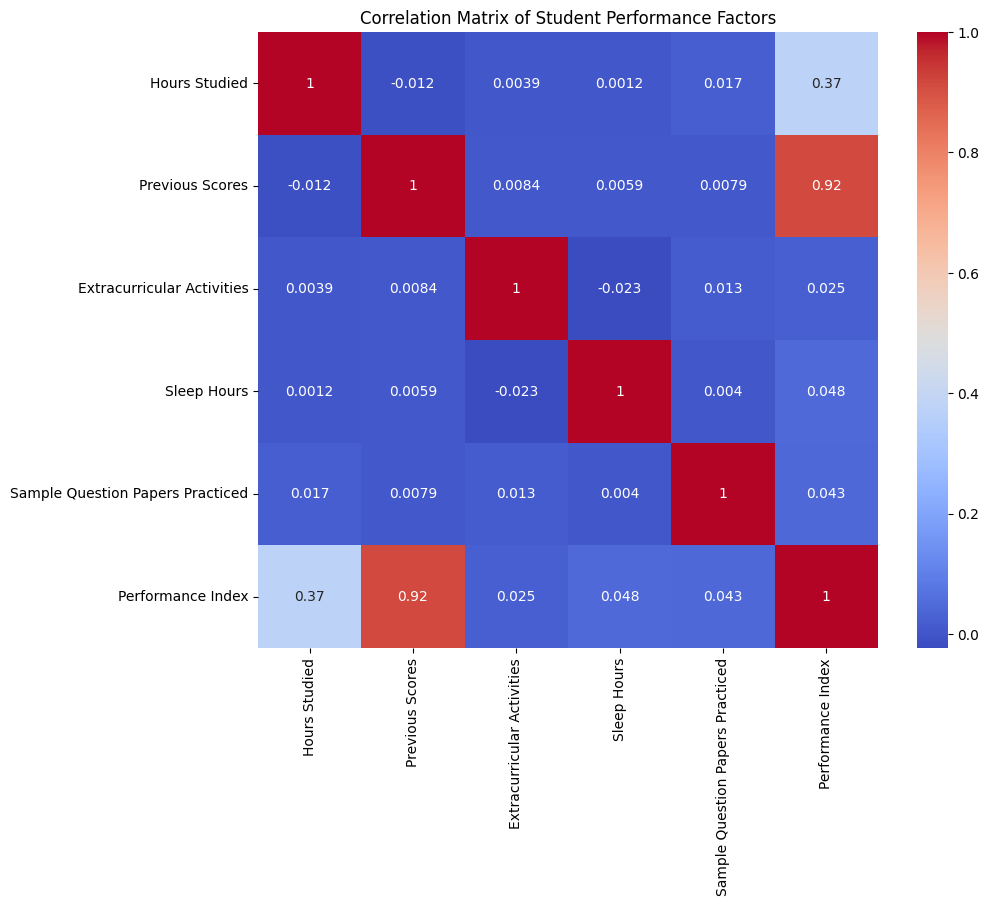

In [ ]:
#plot correlation chart

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix of Student Performance Factors")
plt.show()

A **correlation heatmap** is a graphical representation of the correlations (relationships) between different variables in a dataset. It provides a quick, visual way to understand how two variables are associated with each other, and it’s especially useful when analyzing a dataset with multiple features.



**Key Elements of a Correlation Heatmap**
Color Gradient: The color intensity indicates the strength and direction of the correlation:

Positive correlations are shown in one color (usually shades of red or blue), with stronger positive correlations being more intense.

Negative correlations are shown in another color (often the opposite color on the scale), with stronger negative correlations being more intense.

Colors close to zero (often light or neutral) indicate little or no correlation.

**Correlation Values**: The heatmap often includes the correlation coefficients within each cell. These values range from -1 to 1:

+1: Perfect positive correlation (as one variable increases, the other also increases).

-1: Perfect negative correlation (as one variable increases, the other decreases).

0: No correlation (the variables don’t have a linear relationship).



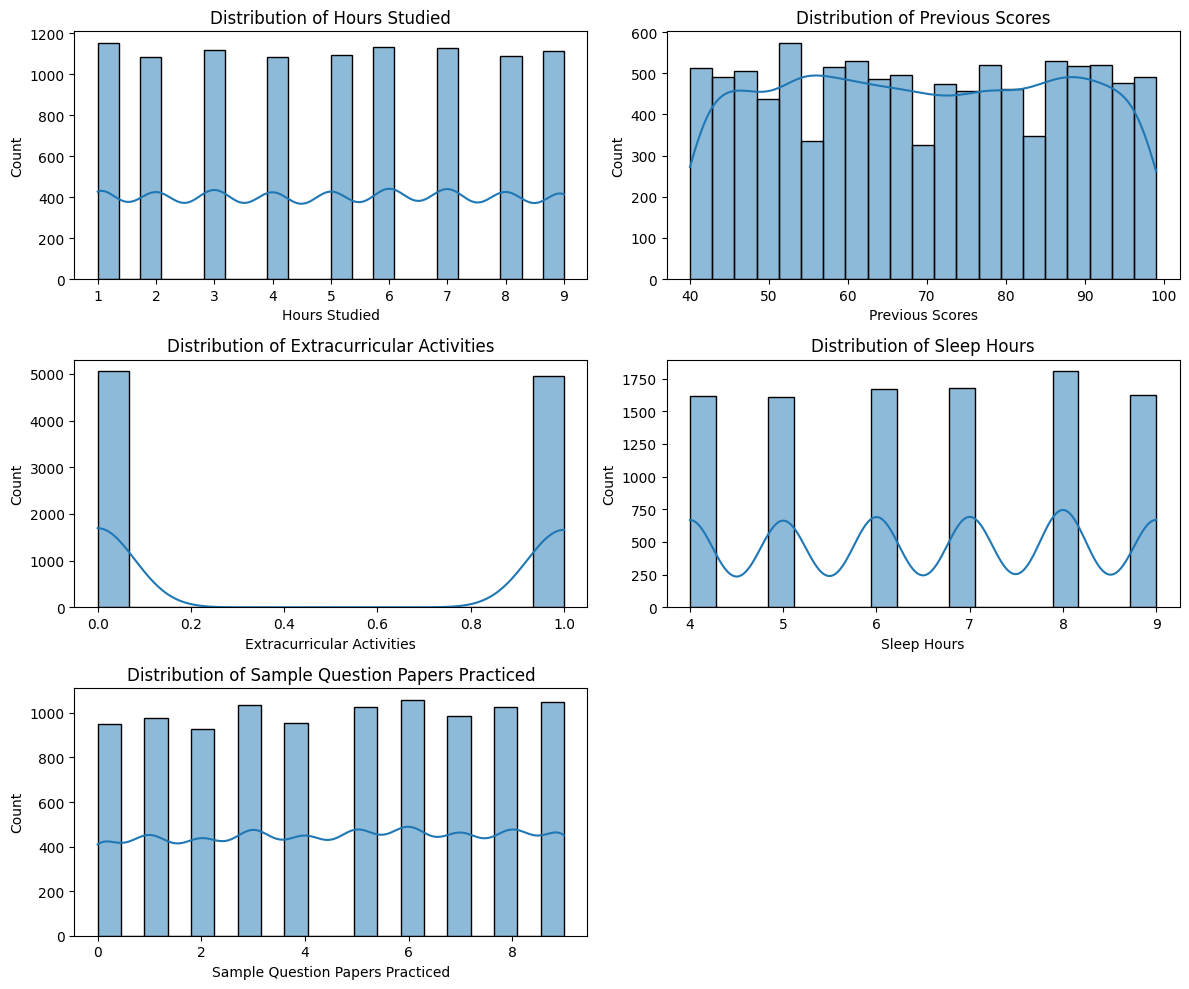

In [ ]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(x.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(x[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


The code generates a series of distribution plots for each feature in the dataset, providing an overview of how values are distributed across all input variables.



These individual distribution plots allow us to quickly assess each feature’s shape and spread, helping identify potential issues like skewness, outliers, or high variability that may require preprocessing before model training.

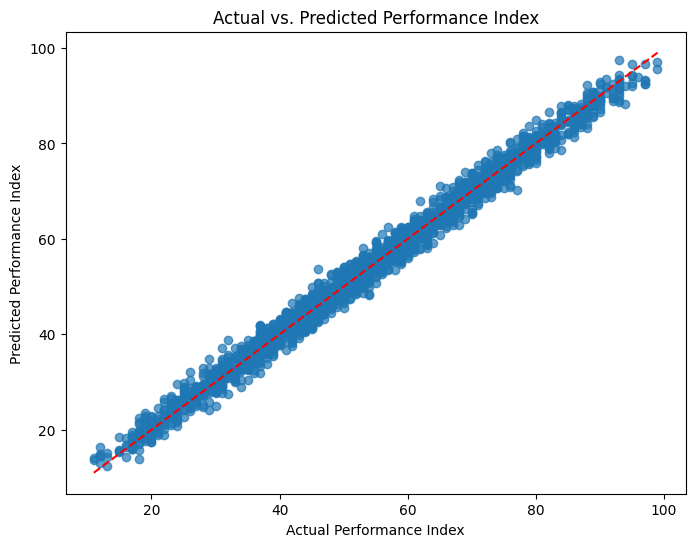

In [ ]:
y_pred = models["Linear Regression"].predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs. Predicted Performance Index")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect prediction
plt.show()

**Points close to the red line**: Predictions are accurate, meaning the model's predictions closely align with the actual Performance Index values.

**Points far from the red line**: These represent prediction errors, where the model's predictions differ significantly from actual values. A large number of points far from the line indicates that the model might struggle to generalize well on unseen data.

**Pattern or Trend**: If most points form a pattern close to the red line with minimal spread, this suggests a well-fitted model.

In this case, this plot provides a clear, visual way to assess the model’s accuracy and consistency by showing how well predicted values align with actual values in the test set.

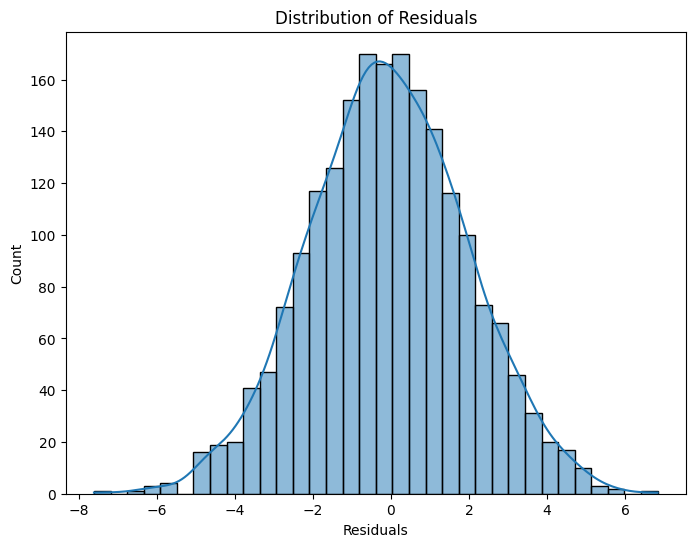

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

The code generates a residual plot showing the distribution of errors (residuals) from the predictions made by the model. Residuals are calculated as the difference between the actual values and the predicted values:

Residuals=Actual Performance Index−Predicted Performance Index


This plot provides insight into the model’s prediction errors and whether they meet certain assumptions, particularly normality and consistency.

This plot is useful for verifying the quality of predictions and assumptions about residual behavior in regression, helping assess model performance and highlight areas where improvements might be needed.

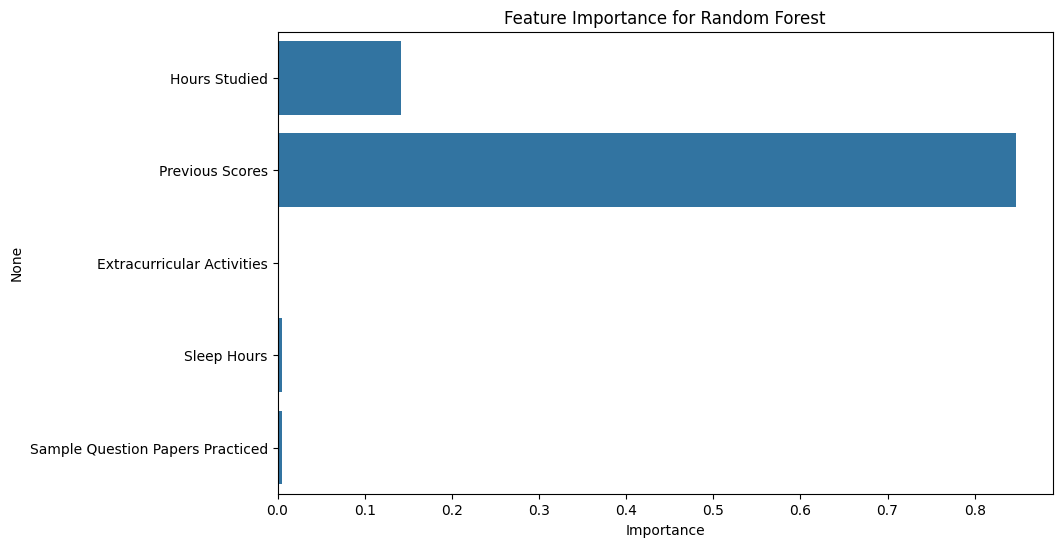

In [ ]:
importances = models["Random Forest"].feature_importances_
feature_names = x.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Importance")
plt.title("Feature Importance for Random Forest")
plt.show()


The code generates a feature importance plot for the Random Forest model, which helps identify which features contribute the most to the model’s predictions.

Each bar represents a feature from the dataset, and the length of the bar indicates the importance of that feature in predicting the target variable, Performance Index.
Feature importance values quantify the contribution of each feature, with higher values indicating a stronger impact on the model’s predictions.

By understanding feature importances, we gain actionable insights into which factors have the most impact, allowing us to focus on significant predictors (e.g., increasing study hours or practice questions) to improve outcomes.